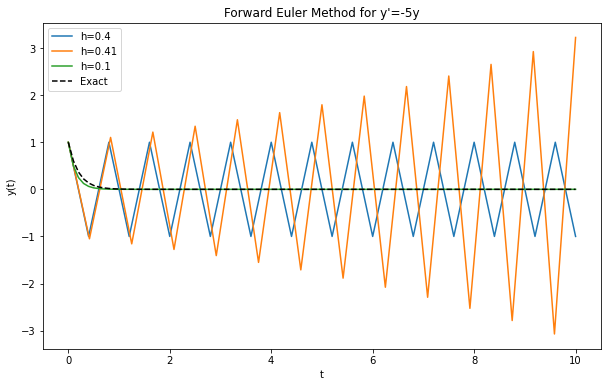

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# ------------------------------------------
# Problem 1a: Forward Euler for y' = -5y
# ------------------------------------------
def forward_euler_linear(h, t_end=10):
    N = int(t_end / h)
    y = np.zeros(N+1)
    t = np.linspace(0, t_end, N+1)
    y[0] = 1
    for n in range(N):
        y[n+1] = y[n] * (1 - 5*h)
    return t, y
h_values = [0.4, 0.41, 0.1]
plt.figure(figsize=(10,6))
for h in h_values:
    t, y = forward_euler_linear(h)
    plt.plot(t, y, label=f'h={h}')
t_exact = np.linspace(0,10,100)
plt.plot(t_exact, np.exp(-5*t_exact), 'k--', label='Exact')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Forward Euler Method for y\'=-5y')
plt.legend()
plt.show()

## Forward Euler 臨界穩定性分析 (y' = -5y)

Forward Euler 對線性方程 \(y' = \lambda y\) 的疊代公式：

$$
y_{n+1} = y_n (1 + h \lambda)
$$

**穩定性條件**：

$$
|1 + h \lambda| \le 1
$$

對 \(y' = -5y\)（\(\lambda = -5\)）：

$$
|1 - 5h| \le 1 \quad \implies \quad 0 \le h \le 0.4
$$

**臨界值 \(h = 0.4\)**：

$$
1 - 5h = 1 - 2 = -1
$$

此時疊代公式變成：

$$
y_{n+1} = -y_n
$$

所以數值解會 **交替震盪**（正負交替）：

$$
y_1 = -y_0, \quad y_2 = -y_1 = y_0, \quad y_3 = -y_2 = -y_0, \dots
$$

雖然振幅不變（\(|y| = 1\)），數值解並不發散，但會交替，屬於 **臨界穩定（critical stability）**。

- \(h < 0.4\) → \(|1 - 5h| < 1\) → 震盪幅度會衰減 → **穩定**  
- \(h > 0.4\) → \(|1 - 5h| > 1\) → 振幅增大 → **不穩定**



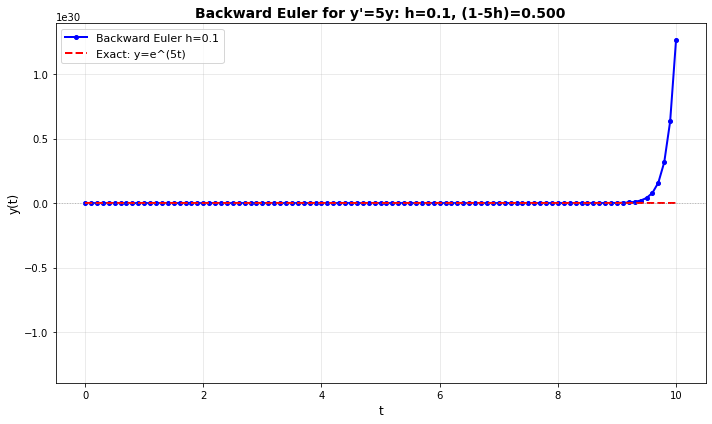

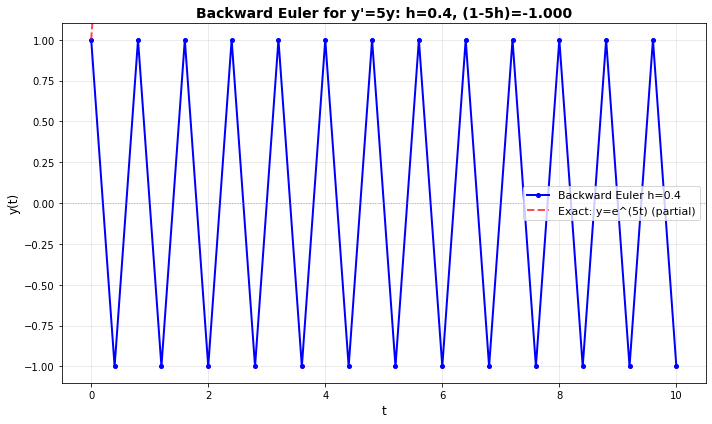

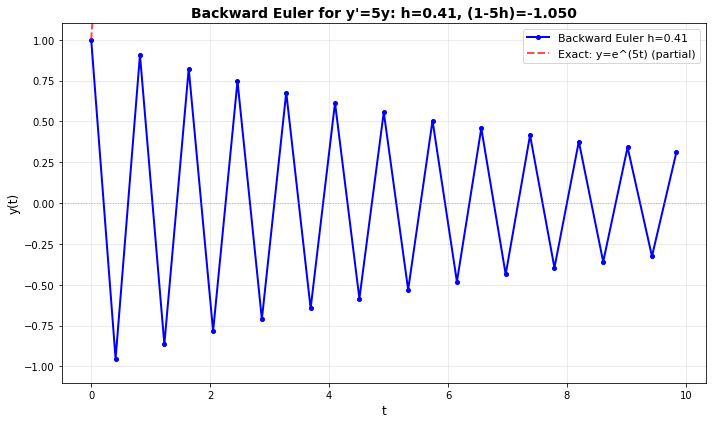

In [41]:
# ------------------------------------------
# Problem 1b: Forward Euler for y' = 5y
# ------------------------------------------
def backward_euler(y0, t_end, h):
    N = int(t_end / h)
    t = np.linspace(0, N*h, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        y[n+1] = y[n] / (1 - 5*h)
    return t, y

# 設定參數
y0 = 1
t_end = 10
hs = [0.1, 0.4, 0.41]

# 精確解
t_exact = np.linspace(0, t_end, 500)
y_exact = np.exp(5*t_exact)

# ============================================================
# 分別為每個 h 值畫圖
# ============================================================

for h in hs:
    t, y = backward_euler(y0, t_end, h)
    denominator = 1 - 5*h
    
    plt.figure(figsize=(10, 6))
    
    # 數值解
    plt.plot(t, y, 'b-o', linewidth=2, markersize=4, label=f'Backward Euler h={h}')
    
    
    if h == 0.1:
        plt.plot(t_exact, y_exact, 'r--', linewidth=2, label='Exact: y=e^(5t)')
    else:
        t_exact_short = np.linspace(0, 2, 100)
        y_exact_short = np.exp(5*t_exact_short)
        plt.plot(t_exact_short, y_exact_short, 'r--', linewidth=2, 
                label='Exact: y=e^(5t) (partial)', alpha=0.7)
    
    # 參考線
    plt.axhline(y=0, color='gray', linestyle=':', linewidth=1, alpha=0.5)
    
    # 標題和標籤
    plt.title(f'Backward Euler for y\'=5y: h={h}, (1-5h)={denominator:.3f}', 
             fontsize=14, fontweight='bold')
    plt.xlabel('t', fontsize=12)
    plt.ylabel('y(t)', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    
    # 根據數值解範圍調整 y 軸
    y_range = max(abs(y.max()), abs(y.min()))
    plt.ylim([-y_range*1.1, y_range*1.1])
    
    plt.tight_layout()
    plt.show()

## Backward Euler for $y' = 5y$

Backward Euler 的疊代公式為：

$$
y_{n+1} = y_n + h\, f(t_{n+1}, y_{n+1})
$$

對線性方程 $y' = 5y$：

$$
y_{n+1} = y_n + h(5y_{n+1})
\quad \Longrightarrow \quad
y_{n+1} = \frac{y_n}{1 - 5h}.
$$

---

### 穩定性分析

對一般線性方程 $y' = \lambda y$，Backward Euler 的放大因子為：

$$
R(h\lambda) = \frac{1}{1 - h\lambda}.
$$

因此在本題 $\lambda = 5$ 時：

$$
R = \frac{1}{1 - 5h}.
$$

- Backward Euler 屬於 **A-穩定**，對於 $\operatorname{Re}(\lambda) < 0$ 的衰減型問題能保證穩定。  
- 然而當 $\lambda > 0$（如本題）時，Backward Euler **無法抑制真實解的增長**，其行為會依步長 $h$ 而有明顯差異。  
- 放大因子 $R$ 的**大小與符號**決定數值解的型態：  
  - 若 $|R| > 1$：數值解會在絕對值上放大（可能發散）。  
  - 若 $|R| < 1$：數值解會衰減。  
  - 若 $R < 0$：數值解會正負交替（產生震盪）。

---

### 數值行為
          
> - 當 $0 < h < 0.4$ 時，$|R| > 1$，數值解會放大（發散傾向）。  
> - 當 $h = 0.4$ 時，$|R| = 1$，會出現交替震盪。  
> - 當 $h > 0.4$ 時，$|R| < 1$，數值解衰減且震盪。  

因此，Backward Euler 對於 $\lambda > 0$ 的增長問題在不同步長下可能表現為 **增長、震盪或衰減**，  
與真實解 $y(t) = e^{5t}$ 的單調正向增長性質完全不同。

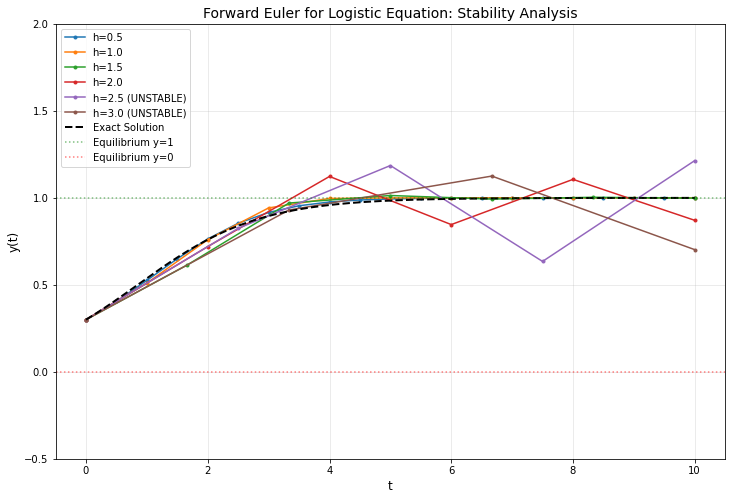


STABILITY ANALYSIS FOR y' = y(1-y)

At equilibrium y* = 1:
  f'(1) = 1 - 2(1) = -1
  Stability condition: |1 + h*f'(1)| = |1 - h| ≤ 1
  Result: 0 < h ≤ 2

Qualitative correctness:
  h = 0.5: ✓ CORRECT (final value:   1.0000)
  h = 1.0: ✓ CORRECT (final value:   1.0000)
  h = 1.5: ✓ CORRECT (final value:   0.9983)
  h = 2.0: ✗ INCORRECT (final value:   0.8710)
  h = 2.5: ✗ INCORRECT (final value:   1.2143)
  h = 3.0: ✗ INCORRECT (final value:   0.7023)


In [9]:
# ------------------------------------------
# Problem 2: Forward Euler for logistic equation y' = y(1-y)
# ------------------------------------------
def forward_euler_logistic(h, y0=0.1, t_end=10):
    N = int(t_end / h)
    y = np.zeros(N+1)
    t = np.linspace(0, t_end, N+1)
    y[0] = y0
    for n in range(N):
        y[n+1] = y[n] + h * y[n] * (1 - y[n])
        # 不要 clip! 讓我們看到不穩定的行為
    return t, y
# 測試不同的 h 值,包括超過穩定性邊界的值
h_values_logistic = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = 0.3
plt.figure(figsize=(12,8))
# 繪製數值解
for h in h_values_logistic:
    t, y = forward_euler_logistic(h, y0)
    label_str = f'h={h}'
    if h > 2:
        label_str += ' (UNSTABLE)'
    plt.plot(t, y, marker='o', markersize=3, label=label_str)
# 繪製精確解
t_cont = np.linspace(0, 10, 200)
y_exact = 1 / (1 + (1/y0 - 1) * np.exp(-t_cont))
plt.plot(t_cont, y_exact, 'k--', linewidth=2, label='Exact Solution')
# 繪製平衡點
plt.axhline(y=1, color='green', linestyle=':', alpha=0.5, label='Equilibrium y=1')
plt.axhline(y=0, color='red', linestyle=':', alpha=0.5, label='Equilibrium y=0')
plt.xlabel('t', fontsize=12)
plt.ylabel('y(t)', fontsize=12)
plt.title('Forward Euler for Logistic Equation: Stability Analysis', fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.ylim([-0.5, 2.0])  # 擴大 y 軸範圍以觀察不穩定行為
plt.show()
# 輸出穩定性分析
print("\n" + "="*60)
print("STABILITY ANALYSIS FOR y' = y(1-y)")
print("="*60)
print("\nAt equilibrium y* = 1:")
print("  f'(1) = 1 - 2(1) = -1")
print("  Stability condition: |1 + h*f'(1)| = |1 - h| ≤ 1")
print("  Result: 0 < h ≤ 2")
print("\nQualitative correctness:")
for h in h_values_logistic:
    t, y = forward_euler_logistic(h, y0, t_end=10)
    stays_positive = np.all(y >= -0.01)  # 允許小誤差
    stays_bounded = np.all(y <= 1.1)
    is_correct = stays_positive and stays_bounded
    status = "✓ CORRECT" if is_correct else "✗ INCORRECT"
    print(f"  h = {h:3.1f}: {status} (final value: {y[-1]:8.4f})")
print("="*60)

## Forward Euler 穩定性分析 (Logistic 方程 $y' = y(1-y)$)

- **平衡點**：$y^* = 1$
- **線性化導數**：$f'(y^*) = 1 - 2 \cdot 1 = -1$
- **Forward Euler 穩定性條件**：

$$
|1 + h f'(y^*)| = |1 - h| \le 1 \implies 0 < h \le 2
$$

### 結論
- $h < 2$ → 數值解收斂到平衡點，定性正確  
- $h = 2$ → 臨界值，可能開始振盪，定性略有偏差  
- $h > 2$ → 不穩定，數值解發散或振盪
